In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
activas = pd.read_csv('../Datasets/Activasv2.csv',decimal=',')
concursos = pd.read_csv('../Datasets/Concursosv2.csv',decimal=',')

/usr/local/anaconda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (149) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
activas.head()

,Nombre,Código NIF,Localidad,Comunidad autónoma,Forma jurídica,Estado,Ultimo año disponible,Código primario CNAE 2009,Ingresos de explotación EUR Últ. año disp.,Ingresos de explotación EUR Año - 1,...,Necesidad fondo maniobra % Últ. año disp.,Necesidad fondo maniobra % Año - 1,Necesidad fondo maniobra % Año - 2,Tesorería % Últ. año disp.,Tesorería % Año - 1,Tesorería % Año - 2,Fondo maniobra % Últ. año disp.,Fondo maniobra % Año - 1,Fondo maniobra % Año - 2,Incidencias Judiciales
0,MERCADONA SA,A46103834,TAVERNES BLANQUES,Comunidad Valenciana,Sociedad anonima,Activa,31/12/2018,4711.0,22323170000,21072429000.0,...,0.12,0.01,-0.02,-5.27,-13.71,1.38,NaN,NaN,NaN,1.0
1,REPSOL PETROLEO SA,A28047223,MADRID,Madrid,Sociedad anonima,Activa,31/12/2017,1920.0,19651680000,16161180000.0,...,-2.03,6.87,-0.91,-8.32,-96.28,2647.52,17.29,68.55,-37.65,0.0
2,COMPAÑIA ESPAÑOLA DE PETROLEOS SAU,A28003119,MADRID,Madrid,Sociedad anonima,Activa,31/12/2018,1920.0,19464892000,16159083000.0,...,24.24,-1.07,2.98,-69.85,-66.21,16.13,7.47,21.51,4.83,3.0
3,INDUSTRIA DE DISEÑO TEXTIL SA,A15075062,ARTEIXO,Galicia,Sociedad anonima,Activa,31/01/2019,4642.0,16923000000,10481000000.0,...,-0.48,-0.15,0.15,123.96,-9.38,17.63,12.73,4.81,78.73,0.0
4,REPSOL COMERCIAL DE PRODUCTOS PETROLIFEROS SA,A80298839,MADRID,Madrid,Sociedad anonima,Activa,31/12/2017,4671.0,14149444000,12357809000.0,...,-0.35,-0.02,0.52,1109.80,-93.10,646.46,27.55,17.95,-24.03,3.0


In [4]:
activas.shape

(27260, 282)

In [5]:
concursos.head()

,Nombre,Localidad,Comunidad autónoma,Código NIF,Forma jurídica,Estado,Ultimo año disponible,Código primario CNAE 2009,Ingresos de explotación EUR Año - 2,Ingresos de explotación EUR Año - 3,...,Fondo maniobra % Año - 2,Fondo maniobra % Año - 3,Fondo maniobra % Año - 4,Necesidad fondo maniobra % Año - 2,Necesidad fondo maniobra % Año - 3,Necesidad fondo maniobra % Año - 4,Tesorería % Año - 2,Tesorería % Año - 3,Tesorería % Año - 4,Incidencias Judiciales
0,CORSAN-CORVIAM CONSTRUCCION SA,MADRID,Madrid,A79222709,Sociedad anonima,Concurso,31/12/2017,4110.0,450857000.0,620190000.0,...,NaN,NaN,NaN,-0.30,0.04,0.22,-27.99,24.73,-49.53,50.0
1,CODYT SA,BARCELONA,Cataluña,A58358177,Sociedad anonima,Concurso,31/12/2009,4634.0,174135481.0,146540648.0,...,50.55,13.56,-11.44,0.54,0.13,-0.13,-45.29,81.96,-46.55,1.0
2,O W BUNKER SPAIN SL,MADRID,Madrid,B84546415,Sociedad limitada,Concurso,31/12/2013,4612.0,155778559.0,163773900.0,...,458.06,-78.31,2203.57,-0.83,16.37,-0.92,6.32,-16.31,147.09,1.0
3,THYSSEN ROS CASARES SA,PUIG,Comunidad Valenciana,A46467965,Sociedad anonima,Concurso,30/09/2012,2432.0,107899956.0,91167053.0,...,41.55,-52.40,28.70,0.37,-0.62,0.30,776.05,250.35,-60.82,1.0
4,ADVEO ESPAÑA SA.,TRES CANTOS,Madrid,A82351867,Sociedad anonima,Concurso,31/12/2016,1723.0,219255000.0,328176000.0,...,24.63,167.34,3.13,0.17,-14.39,-0.44,-27.39,686.21,-94.15,1.0


In [6]:
concursos.shape

(5506, 282)

In [7]:
cols_act = [i for i in activas.columns if i[-2:] == '.1']
cols_con = [i for i in concursos.columns if i[-2:] == '.1']

Estas son columnas que se han selecionado dos veces a la hora de exportar los datasets y deben ser borradas puesto que estan repetidas

In [8]:
activas = activas.drop(cols_act,axis=1)
concursos = concursos.drop(cols_con,axis=1)

In [9]:
activas.shape,concursos.shape

((27260, 267), (5506, 267))

In [10]:
new_columns = []
for i in concursos.columns:
    if i[-3:] == '- 2':
        new_columns.append(i[:-7]+'Últ. año disp.')
    elif i[-3:] == '- 3':
        new_columns.append(i[:-3]+'- 1')
    elif i[-3:] == '- 4':
        new_columns.append(i[:-3]+'- 2')
    else:
        new_columns.append(i)
        
new_columns

['Nombre',
 'Localidad',
 'Comunidad autónoma',
 'Código NIF',
 'Forma jurídica',
 'Estado',
 'Ultimo año disponible',
 'Código primario CNAE 2009',
 'Ingresos de explotación EUR Últ. año disp.',
 'Ingresos de explotación EUR Año - 1',
 'Ingresos de explotación EUR Año - 2',
 'Result. ordinarios antes Impuestos EUR Últ. año disp.',
 'Result. ordinarios antes Impuestos EUR Año - 1',
 'Result. ordinarios antes Impuestos EUR Año - 2',
 'Resultado del Ejercicio EUR Últ. año disp.',
 'Resultado del Ejercicio EUR Año - 1',
 'Resultado del Ejercicio EUR Año - 2',
 'Total Activo EUR Últ. año disp.',
 'Total Activo EUR Año - 1',
 'Total Activo EUR Año - 2',
 'Fondos propios EUR Últ. año disp.',
 'Fondos propios EUR Año - 1',
 'Fondos propios EUR Año - 2',
 'Rentabilidad económica (%) % Últ. año disp.',
 'Rentabilidad económica (%) % Año - 1',
 'Rentabilidad económica (%) % Año - 2',
 'Rentabilidad financiera (%) % Últ. año disp.',
 'Rentabilidad financiera (%) % Año - 1',
 'Rentabilidad financi

In [11]:
set([i for i in activas.columns]) - set(new_columns)

set()

In [12]:
val = concursos.values
concursos =  pd.DataFrame(val,columns=new_columns)
concursos.shape

(5506, 267)

In [13]:
activas = activas[concursos.columns]

In [14]:
dataset = pd.concat([activas,concursos],axis=0,ignore_index=True)
dataset

,Nombre,Localidad,Comunidad autónoma,Código NIF,Forma jurídica,Estado,Ultimo año disponible,Código primario CNAE 2009,Ingresos de explotación EUR Últ. año disp.,Ingresos de explotación EUR Año - 1,...,Fondo maniobra % Últ. año disp.,Fondo maniobra % Año - 1,Fondo maniobra % Año - 2,Necesidad fondo maniobra % Últ. año disp.,Necesidad fondo maniobra % Año - 1,Necesidad fondo maniobra % Año - 2,Tesorería % Últ. año disp.,Tesorería % Año - 1,Tesorería % Año - 2,Incidencias Judiciales
0,MERCADONA SA,TAVERNES BLANQUES,Comunidad Valenciana,A46103834,Sociedad anonima,Activa,31/12/2018,4711.0,22323170000,21072429000.0,...,NaN,NaN,NaN,0.12,0.01,-0.02,-5.27,-13.71,1.38,1.0
1,REPSOL PETROLEO SA,MADRID,Madrid,A28047223,Sociedad anonima,Activa,31/12/2017,1920.0,19651680000,16161180000.0,...,17.29,68.55,-37.65,-2.03,6.87,-0.91,-8.32,-96.28,2647.52,0.0
2,COMPAÑIA ESPAÑOLA DE PETROLEOS SAU,MADRID,Madrid,A28003119,Sociedad anonima,Activa,31/12/2018,1920.0,19464892000,16159083000.0,...,7.47,21.51,4.83,24.24,-1.07,2.98,-69.85,-66.21,16.13,3.0
3,INDUSTRIA DE DISEÑO TEXTIL SA,ARTEIXO,Galicia,A15075062,Sociedad anonima,Activa,31/01/2019,4642.0,16923000000,10481000000.0,...,12.73,4.81,78.73,-0.48,-0.15,0.15,123.96,-9.38,17.63,0.0
4,REPSOL COMERCIAL DE PRODUCTOS PETROLIFEROS SA,MADRID,Madrid,A80298839,Sociedad anonima,Activa,31/12/2017,4671.0,14149444000,12357809000.0,...,27.55,17.95,-24.03,-0.35,-0.02,0.52,1109.8,-93.1,646.46,3.0
5,CEPSA TRADING SAU,MADRID,Madrid,A86597325,Sociedad anonima,Activa,31/12/2017,4671.0,13517132000,10959335000.0,...,149.34,94.37,-76.19,-0.69,-0.06,-0.04,58.67,2125.27,NaN,NaN
6,ENDESA ENERGIA SAU,MADRID,Madrid,A81948077,Sociedad anonima,Activa,31/12/2017,3514.0,12622285000,11767670000.0,...,1.27,-10.05,8.17,-1.17,0.29,0.59,-0.93,-34.2,42.54,9.0
7,EL CORTE INGLES SA,MADRID,Madrid,A28017895,Sociedad anonima,Activa,28/02/2018,4719.0,11732409000,11001619000.0,...,2.12,2.18,10.46,4.45,-0.13,0.78,143.63,-3.72,8.06,5.0
8,SEAT SA,MARTORELL,Cataluña,A28049161,Sociedad anonima,Activa,31/12/2018,2910.0,10495100000,10013400000.0,...,257.27,-16.81,-14.45,-0.13,0.02,-0.12,NaN,NaN,-100,0.0
9,FORD ESPAÑA SL,ALCOBENDAS,Madrid,B46066361,Sociedad limitada,Activa,31/12/2017,2910.0,9209636000,8992948000.0,...,NaN,NaN,NaN,0.43,-0.19,0.23,201.6,10.42,23.96,0.0


In [15]:
dates = dataset['Ultimo año disponible']
valores = []
for date in dates:
    valores.append(int(date[6:]))

date = pd.DataFrame(valores,columns=['Ult. año disponible'])
dataset = pd.concat([dataset,date],axis=1)
dataset =  dataset.drop(['Ultimo año disponible'],axis=1)

In [16]:
dataset['Código primario CNAE 2009'] = dataset['Código primario CNAE 2009'].astype(np.float64)
#data = dataset[dataset['Ult. año disponible'] >=2012]#Solo cogemos empresas del 2014 hacia delante
CNAE = pd.read_csv('../Datasets/CNAE/CNAE.csv').drop(['Unnamed: 0'],axis=1)

In [17]:
#(data.Estado == 'Concurso').sum()

In [18]:
CNAE = pd.read_csv('../Datasets/CNAE/CNAE.csv').drop(['Unnamed: 0'],axis=1)

In [19]:
CNAE.head()

,number,description,letter
0,111,"Cultivo de cereales (excepto arroz), legumino...",A
1,112,Cultivo de arroz,A
2,113,"Cultivo de hortalizas, raíces y tubérculos",A
3,114,Cultivo de caña de azúcar,A
4,115,Cultivo de tabaco,A


In [20]:
letter=[]
max_number=[]

for x,z in CNAE.groupby(['letter']):
    letter.append(x)
    max_number.append(max(z['number'].values))
    
convert = list(zip(letter,max_number))
CNAE_values=dataset['Código primario CNAE 2009'].values
print(type(CNAE_values[1]))
valors=[]
for i in CNAE_values:
    flag = True
    for j in convert:
        if (np.isnan(i)) & (flag):
            valors.append(np.nan)
            flag=False
        elif (i <= j[1]) & (flag):
            valors.append(j[0])
            flag=False

<class 'numpy.float64'>


In [21]:
len(valors) == dataset.shape[0]  # se ha ejecutado de manera correcta tiene el mismo numero de registros

True

Este codigo servira para hacer una nueva variable que en vez de mirar el numero tambien se mirará el sector al que pertecene

In [22]:
CNAE_number = pd.DataFrame({
    'CNAE_Number':valors
})
CNAE_number.shape

(32766, 1)

In [23]:
dataset = pd.concat([dataset,CNAE_number],axis=1)

In [24]:
for i in dataset.columns:
    print(i , dataset[i].isnull().any())

Nombre False
Localidad False
Comunidad autónoma False
Código NIF False
Forma jurídica False
Estado False
Código primario CNAE 2009 True
Ingresos de explotación EUR Últ. año disp. True
Ingresos de explotación EUR Año - 1 True
Ingresos de explotación EUR Año - 2 True
Result. ordinarios antes Impuestos EUR Últ. año disp. True
Result. ordinarios antes Impuestos EUR Año - 1 True
Result. ordinarios antes Impuestos EUR Año - 2 True
Resultado del Ejercicio EUR Últ. año disp. True
Resultado del Ejercicio EUR Año - 1 True
Resultado del Ejercicio EUR Año - 2 True
Total Activo EUR Últ. año disp. True
Total Activo EUR Año - 1 True
Total Activo EUR Año - 2 True
Fondos propios EUR Últ. año disp. True
Fondos propios EUR Año - 1 True
Fondos propios EUR Año - 2 True
Rentabilidad económica (%) % Últ. año disp. True
Rentabilidad económica (%) % Año - 1 True
Rentabilidad económica (%) % Año - 2 True
Rentabilidad financiera (%) % Últ. año disp. True
Rentabilidad financiera (%) % Año - 1 True
Rentabilidad fi

Fondos propios % Año - 2 True
Acreedores a largo plazo % Últ. año disp. True
Acreedores a largo plazo % Año - 1 True
Acreedores a largo plazo % Año - 2 True
Fondo maniobra % Últ. año disp. True
Fondo maniobra % Año - 1 True
Fondo maniobra % Año - 2 True
Necesidad fondo maniobra % Últ. año disp. True
Necesidad fondo maniobra % Año - 1 True
Necesidad fondo maniobra % Año - 2 True
Tesorería % Últ. año disp. True
Tesorería % Año - 1 True
Tesorería % Año - 2 True
Incidencias Judiciales True
Ult. año disponible False
CNAE_Number True


In [25]:
dataset = dataset.drop(dataset[dataset.CNAE_Number.isnull()].index)
#dataset = dataset.drop(dataset[dataset.Localidad.isnull()].index)
#dataset = dataset.drop([75516])
dataset

,Nombre,Localidad,Comunidad autónoma,Código NIF,Forma jurídica,Estado,Código primario CNAE 2009,Ingresos de explotación EUR Últ. año disp.,Ingresos de explotación EUR Año - 1,Ingresos de explotación EUR Año - 2,...,Fondo maniobra % Año - 2,Necesidad fondo maniobra % Últ. año disp.,Necesidad fondo maniobra % Año - 1,Necesidad fondo maniobra % Año - 2,Tesorería % Últ. año disp.,Tesorería % Año - 1,Tesorería % Año - 2,Incidencias Judiciales,Ult. año disponible,CNAE_Number
0,MERCADONA SA,TAVERNES BLANQUES,Comunidad Valenciana,A46103834,Sociedad anonima,Activa,4711.0,22323170000,21072429000.0,19823515000.0,...,NaN,0.12,0.01,-0.02,-5.27,-13.71,1.38,1.0,2018,G
1,REPSOL PETROLEO SA,MADRID,Madrid,A28047223,Sociedad anonima,Activa,1920.0,19651680000,16161180000.0,18874398000.0,...,-37.65,-2.03,6.87,-0.91,-8.32,-96.28,2647.52,0.0,2017,C
2,COMPAÑIA ESPAÑOLA DE PETROLEOS SAU,MADRID,Madrid,A28003119,Sociedad anonima,Activa,1920.0,19464892000,16159083000.0,13477469000.0,...,4.83,24.24,-1.07,2.98,-69.85,-66.21,16.13,3.0,2018,C
3,INDUSTRIA DE DISEÑO TEXTIL SA,ARTEIXO,Galicia,A15075062,Sociedad anonima,Activa,4642.0,16923000000,10481000000.0,9494686000.0,...,78.73,-0.48,-0.15,0.15,123.96,-9.38,17.63,0.0,2019,G
4,REPSOL COMERCIAL DE PRODUCTOS PETROLIFEROS SA,MADRID,Madrid,A80298839,Sociedad anonima,Activa,4671.0,14149444000,12357809000.0,13927278000.0,...,-24.03,-0.35,-0.02,0.52,1109.8,-93.1,646.46,3.0,2017,G
5,CEPSA TRADING SAU,MADRID,Madrid,A86597325,Sociedad anonima,Activa,4671.0,13517132000,10959335000.0,11722959000.0,...,-76.19,-0.69,-0.06,-0.04,58.67,2125.27,NaN,NaN,2017,G
6,ENDESA ENERGIA SAU,MADRID,Madrid,A81948077,Sociedad anonima,Activa,3514.0,12622285000,11767670000.0,12382735000.0,...,8.17,-1.17,0.29,0.59,-0.93,-34.2,42.54,9.0,2017,D
7,EL CORTE INGLES SA,MADRID,Madrid,A28017895,Sociedad anonima,Activa,4719.0,11732409000,11001619000.0,10649650000.0,...,10.46,4.45,-0.13,0.78,143.63,-3.72,8.06,5.0,2018,G
8,SEAT SA,MARTORELL,Cataluña,A28049161,Sociedad anonima,Activa,2910.0,10495100000,10013400000.0,9023100000.0,...,-14.45,-0.13,0.02,-0.12,NaN,NaN,-100,0.0,2018,C
9,FORD ESPAÑA SL,ALCOBENDAS,Madrid,B46066361,Sociedad limitada,Activa,2910.0,9209636000,8992948000.0,8966846000.0,...,NaN,0.43,-0.19,0.23,201.6,10.42,23.96,0.0,2017,C


In [26]:
for i in range(7,len(dataset.columns)-1):
    #print(i)
    #if dataset.dtypes[dataset.columns[i]] == 'O':
    dataset[dataset.columns[i]] = dataset[dataset.columns[i]].astype(np.float64)

Text(0.5, 1.0, 'Histograma')

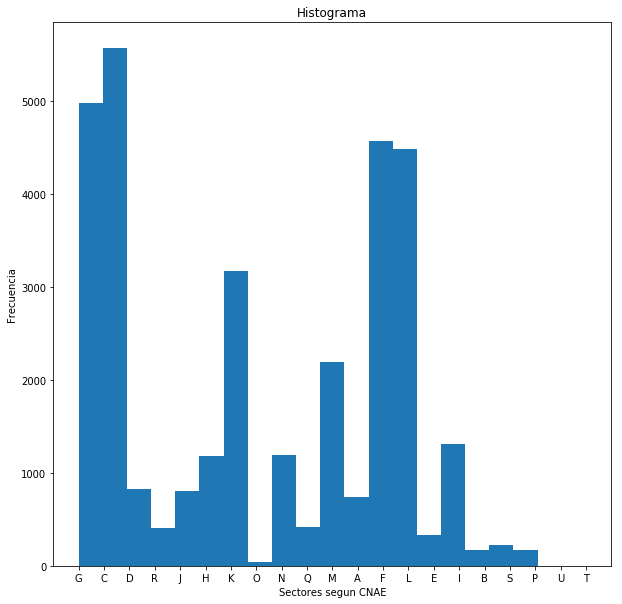

In [27]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.hist(list(dataset.CNAE_Number),bins=21)
plt.xlabel('Sectores segun CNAE')
plt.ylabel('Frecuencia')
plt.title('Histograma')

In [28]:
for i,value in zip(dataset.dtypes.axes[0],dataset.dtypes.values):
    print(i,value)

Nombre object
Localidad object
Comunidad autónoma object
Código NIF object
Forma jurídica object
Estado object
Código primario CNAE 2009 float64
Ingresos de explotación EUR Últ. año disp. float64
Ingresos de explotación EUR Año - 1 float64
Ingresos de explotación EUR Año - 2 float64
Result. ordinarios antes Impuestos EUR Últ. año disp. float64
Result. ordinarios antes Impuestos EUR Año - 1 float64
Result. ordinarios antes Impuestos EUR Año - 2 float64
Resultado del Ejercicio EUR Últ. año disp. float64
Resultado del Ejercicio EUR Año - 1 float64
Resultado del Ejercicio EUR Año - 2 float64
Total Activo EUR Últ. año disp. float64
Total Activo EUR Año - 1 float64
Total Activo EUR Año - 2 float64
Fondos propios EUR Últ. año disp. float64
Fondos propios EUR Año - 1 float64
Fondos propios EUR Año - 2 float64
Rentabilidad económica (%) % Últ. año disp. float64
Rentabilidad económica (%) % Año - 1 float64
Rentabilidad económica (%) % Año - 2 float64
Rentabilidad financiera (%) % Últ. año disp. 

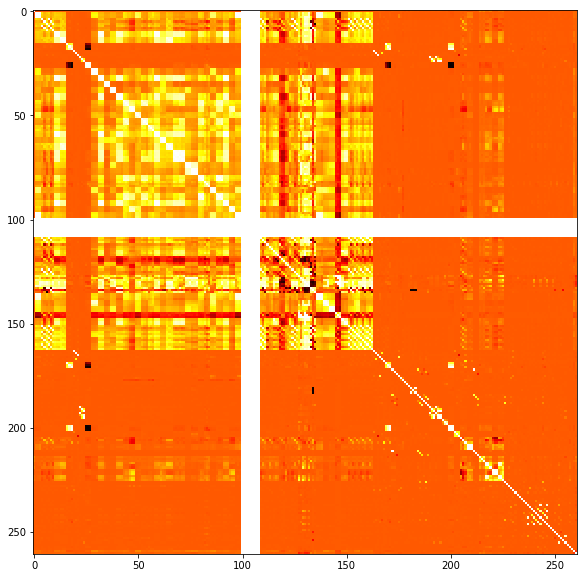

In [29]:
plt.figure(figsize=(10,10))
plt.imshow(dataset.corr(),cmap='hot',interpolation='nearest') #Esta franja en cruz son datos que se encuentran NAN
plt.savefig('mapa_calor_WN')
plt.show()

In [30]:
num_nulos = int(dataset.shape[0] / 2)
datos_nulos=dataset.isnull().sum()
delete=datos_nulos[datos_nulos>=num_nulos]
print(delete)
sup=list(delete.index)
dataset = dataset.drop(sup,axis=1)

Provisiones EUR Últ. año disp.                               26538
Provisiones EUR Año - 1                                      26603
Provisiones EUR Año - 2                                      26659
Consumo de mercaderías y de materias EUR Últ. año disp.      32764
Consumo de mercaderías y de materias EUR Año - 1             32764
Consumo de mercaderías y de materias EUR Año - 2             32764
Resultado bruto EUR Últ. año disp.                           32764
Resultado bruto EUR Año - 1                                  32764
Resultado bruto EUR Año - 2                                  32764
Otros gastos de explotación EUR Últ. año disp.               32764
Otros gastos de explotación EUR Año - 1                      32764
Otros gastos de explotación EUR Año - 2                      32764
Ingresos extraordinarios EUR Últ. año disp.                  32210
Ingresos extraordinarios EUR Año - 1                         32045
Ingresos extraordinarios EUR Año - 2                         3

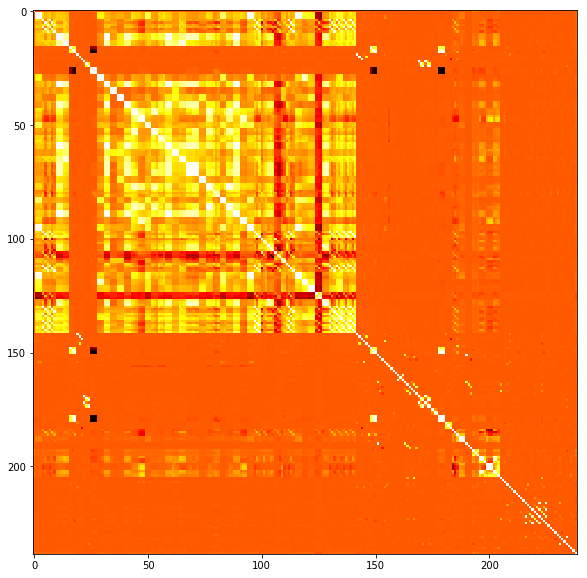

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(dataset.corr(),cmap='hot',interpolation='nearest') #Esta franja en cruz son datos que se encuentran NAN

In [32]:
datos_nulos=dataset.isnull().sum()
datos_nulos

Nombre                                                       0
Localidad                                                    0
Comunidad autónoma                                           0
Código NIF                                                   0
Forma jurídica                                               0
Estado                                                       0
Código primario CNAE 2009                                    0
Ingresos de explotación EUR Últ. año disp.                 978
Ingresos de explotación EUR Año - 1                       1744
Ingresos de explotación EUR Año - 2                       3066
Result. ordinarios antes Impuestos EUR Últ. año disp.      721
Result. ordinarios antes Impuestos EUR Año - 1            1050
Result. ordinarios antes Impuestos EUR Año - 2            2083
Resultado del Ejercicio EUR Últ. año disp.                 732
Resultado del Ejercicio EUR Año - 1                       1056
Resultado del Ejercicio EUR Año - 2                    

In [33]:
delete

Provisiones EUR Últ. año disp.                               26538
Provisiones EUR Año - 1                                      26603
Provisiones EUR Año - 2                                      26659
Consumo de mercaderías y de materias EUR Últ. año disp.      32764
Consumo de mercaderías y de materias EUR Año - 1             32764
Consumo de mercaderías y de materias EUR Año - 2             32764
Resultado bruto EUR Últ. año disp.                           32764
Resultado bruto EUR Año - 1                                  32764
Resultado bruto EUR Año - 2                                  32764
Otros gastos de explotación EUR Últ. año disp.               32764
Otros gastos de explotación EUR Año - 1                      32764
Otros gastos de explotación EUR Año - 2                      32764
Ingresos extraordinarios EUR Últ. año disp.                  32210
Ingresos extraordinarios EUR Año - 1                         32045
Ingresos extraordinarios EUR Año - 2                         3

In [34]:
datos_nulos[datos_nulos>=10000]

Inmovilizado inmaterial EUR Últ. año disp.        15174
Inmovilizado inmaterial EUR Año - 1               15322
Inmovilizado inmaterial EUR Año - 2               15584
Existencias EUR Últ. año disp.                    11718
Existencias EUR Año - 1                           11987
Existencias EUR Año - 2                           12575
Deudas financieras EUR Últ. año disp.             14533
Deudas financieras EUR Año - 1                    14731
Deudas financieras EUR Año - 2                    15255
Acreedores comerciales EUR Año - 2                10894
Materiales EUR Últ. año disp.                     10125
Materiales EUR Año - 1                            10397
Materiales EUR Año - 2                            10954
Rotación de las existencias % Últ. año disp.      11718
Rotación de las existencias % Año - 1             11987
Rotación de las existencias % Año - 2             12575
Resultados antes de impuestos % Últ. año disp.    12834
Resultados antes de impuestos % Año - 1         

In [35]:
contador=3
columnas=[]
for i in range(7,len(dataset.columns)-2):
    if contador%3 == 0:
        columnas.append(dataset.columns[i][:-15])
    contador+=1

In [36]:
columnas

['Ingresos de explotación EUR',
 'Result. ordinarios antes Impuestos EUR',
 'Resultado del Ejercicio EUR',
 'Total Activo EUR',
 'Fondos propios EUR',
 'Rentabilidad económica (%) %',
 'Rentabilidad financiera (%) %',
 'Liquidez general %',
 'Endeudamiento (%) %',
 'Número empleados',
 'Inmovilizado EUR',
 'Inmovilizado inmaterial EUR',
 'Inmovilizado material EUR',
 'Otros activos fijos EUR',
 'Activo circulante EUR',
 'Existencias EUR',
 'Deudores EUR',
 'Otros activos líquidos EUR',
 'Tesorería EUR',
 'Total activo EUR',
 'Capital suscrito EUR',
 'Otros fondos propios EUR',
 'Pasivo fijo EUR',
 'Acreedores a L. P. EUR',
 'Otros pasivos fijos EUR',
 'Pasivo líquido EUR',
 'Deudas financieras EUR',
 'Acreedores comerciales EUR',
 'Otros pasivos líquidos EUR',
 'Total pasivo y capital propio EUR',
 'Fondo de maniobra EUR',
 'Importe neto Cifra de Ventas EUR',
 'Resultado Explotación EUR',
 'Ingresos financieros EUR',
 'Gastos financieros EUR',
 'Resultado financiero EUR',
 'Impuestos s

Aunque quitemos el ruido en todas las columnas los datos se encuentran aglomerados y  no se encuentran en grupos.


In [37]:
tw = dataset.shape[0] * 0.2
print(tw)
ntrain = dataset.shape[0] - tw
(tw * 100) / ntrain  

6552.8


25.0

Puesto que vamos a hacer tres particiones del dataset 60 para entrenar 20 de validacion y 20 hay que ver para la segunda particion que porcentaje supone un 20 porciento del total en la primera subdivision

In [38]:
X=dataset.drop(['Estado'],axis=1)
y=dataset['Estado']

X_p,X_test,Y_p,Y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=0) #Primera subdivision

X_train,X_val,Y_train,Y_val = train_test_split(X_p,Y_p,test_size = 0.25, stratify = Y_p , random_state = 0)

In [39]:
print(X_train.shape,' Tamaño del entrenamiento',X_val.shape,' Tamaño de validacion', X_test.shape,'Tamaño del test')

(19658, 245)  Tamaño del entrenamiento (6553, 245)  Tamaño de validacion (6553, 245) Tamaño del test


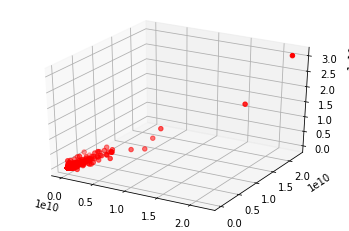

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['Pasivo líquido EUR Últ. año disp.'], dataset['Pasivo líquido EUR Año - 1'], dataset['Pasivo líquido EUR Año - 2'], c='r', marker='o')

In [41]:
columnas_=[]
for i in range(6,len(X_train.columns)-2):
    columnas_.append(X_train.columns[i])

In [42]:
columnas_

['Ingresos de explotación EUR Últ. año disp.',
 'Ingresos de explotación EUR Año - 1',
 'Ingresos de explotación EUR Año - 2',
 'Result. ordinarios antes Impuestos EUR Últ. año disp.',
 'Result. ordinarios antes Impuestos EUR Año - 1',
 'Result. ordinarios antes Impuestos EUR Año - 2',
 'Resultado del Ejercicio EUR Últ. año disp.',
 'Resultado del Ejercicio EUR Año - 1',
 'Resultado del Ejercicio EUR Año - 2',
 'Total Activo EUR Últ. año disp.',
 'Total Activo EUR Año - 1',
 'Total Activo EUR Año - 2',
 'Fondos propios EUR Últ. año disp.',
 'Fondos propios EUR Año - 1',
 'Fondos propios EUR Año - 2',
 'Rentabilidad económica (%) % Últ. año disp.',
 'Rentabilidad económica (%) % Año - 1',
 'Rentabilidad económica (%) % Año - 2',
 'Rentabilidad financiera (%) % Últ. año disp.',
 'Rentabilidad financiera (%) % Año - 1',
 'Rentabilidad financiera (%) % Año - 2',
 'Liquidez general % Últ. año disp.',
 'Liquidez general % Año - 1',
 'Liquidez general % Año - 2',
 'Endeudamiento (%) % Últ. añ

Como podemos ver y tras observar varias variables en este formato no siguen ningun tipo esque me de prediccion por tanto vamos a desarrollar una clase para imputar los valores perdidos de manera automatica

In [43]:
class trainNaN:
    def __init__(self,df,model,columna):
        self.df = copy.copy(df)
        self.columna = columna
        self.columnas = {col:[col+' Últ. año disp.',col+' Año - 1',col+' Año - 2'] for col in columna}
        self.model = copy.copy(model)
        self.models={}
        self.model_q={}
        
    def fit(self):
        
        #print(self.columnas)
        for col in self.columnas:
            data=self.df[self.columnas[col]]
            data=data[data.isnull().any(axis=1) == False]

            data2 = self.df[self.columnas[col]]
            data2 = data2[data2.isnull().any(axis=1)]
            
            contador=0
            models_p = []
            
            for i in self.columnas[col]:
                clon1 = copy.copy(self.model)
                clon2 = copy.copy(self.model)
                clon3 = copy.copy(self.model)
                
                y = data.iloc[:][i]
                X = data.drop([self.columnas[col][contador]],axis=1)
                
                X_p = data.iloc[:][i]
                y_0 = X.drop(X.columns[1],axis=1).iloc[:,0]
                y_1 = X.drop(X.columns[0],axis=1).iloc[:,0]
                
                model_q0 = clon1.fit(pd.DataFrame({'colum':X_p.values}),y_0)
                model_q1 = clon2.fit(pd.DataFrame({'colum':X_p.values}),y_1)
                
                models_01 = [model_q0,model_q1]
                self.model_q[i] = models_01
                
                #print(type(X.iloc[0,0]))
                #print(type(y.loc[0]))
                
                srv = clon3.fit(X,y)
                models_p.append(srv)
                contador += 1
                
            self.models[col] = models_p

            
    def predict(self,testeo,columnas):
        #dataset  =  pd.DataFrame()
        print(testeo.columns)
        print(columnas)
        test_p = testeo.drop(columnas,axis=1)
        test = copy.copy(testeo[columnas])
        #print(dataset)
        #print(self.models)
        contador = 0
        for nrow , row in test.iterrows():
            if(contador % 100 == 0 ):
                print(contador)
            for col in self.columnas:
                row_p = row[self.columnas[col]]
                #print('antes del if')
                if row_p[self.columnas[col]].isnull().sum() == 1:
                    #print('hola he entrado al if')
                    num = list(row_p[self.columnas[col]].isnull()).index(True)
                    X = row_p[list(set(self.columnas[col])-set([self.columnas[col][num]]))]
                    model_=self.models[col][num]
                    #print(model_)
                    row[self.columnas[col][num]]=model_.predict([X.values])[0]
                    #print(row)
                    #print(test)
                    
                elif row_p[self.columnas[col]].isnull().sum() == 2:
                    #print('hola he entrado al elif')
                    null = [i for i in range(3) if row_p[self.columnas[col]].isnull()[i] == True]
                    num = list(row_p[self.columnas[col]].isnull()).index(False)
                    
                    X = [row_p[self.columnas[col][num]]]
                    #print(X)
                    
                    model_0 = self.model_q[self.columnas[col][num]][0]
                    #print(self.model_q[self.columnas[col][num]][0].feature_importances_)
                    row[self.columnas[col][null[0]]] = model_0.predict([X])[0]

                
                    model_1 = self.model_q[self.columnas[col][num]][1]
                    
                    row[self.columnas[col][null[1]]] = model_1.predict([X])[0]
                    #print(row)
                    #print(test)


                    
            contador+=1        
            #print(dataset)
            #data = pd.DataFrame(row)
            #dataset =  pd.concat([dataset,data],axis=1)

                
        test = pd.concat([test_p,test],axis=1)        
        return test


In [44]:
tr = DecisionTreeRegressor(max_depth=10)
train_imp = trainNaN(X_train,tr,columnas)
train_imp.fit()

In [ ]:
from sklearn.neural_network import MLPRegressor
nns =  MLPRegressor(hidden_layer_sizes= (2,2),activation ='identity',
                                            solver = 'adam',max_iter =15000)
train_rf = trainNaN(X_train,nns,columnas)
train_rf.fit()

In [ ]:
#svm = SVR(C=0.000000001,gamma=0.001)
lr = LinearRegression()
train_svr=trainNaN(X_train,lr,columnas)
train_svr.fit()

In [102]:
def error(X_vali,train_imp):
    MSE=[]
    X_val = copy.copy(X_vali)
    count = 0
    for col in train_imp.columnas:

        data=X_val[train_imp.columnas[col]]
        data=data[data.isnull().any(axis=1) == False]
        contador=0        
        for i in train_imp.columnas[col]:
            #print(i)
            #print(data)
            y = data.iloc[:][i]
            X = data.drop([train_imp.columnas[col][contador]],axis=1)
            #print(train_imp.columnas[col][contador])
            #print(X)
            y_predict = train_imp.models[col][contador].predict(X)
            #print('he pasado el predict')
            #print(y_predict)
            scaler = MinMaxScaler()
            scaled_y = scaler.fit_transform(pd.DataFrame({'y':y.values}))
            #print(scaled_y)
            scaled_y_predict = scaler.transform(pd.DataFrame({'y_predict':y_predict}))
            #print(scaled_y_predict)

            contador+=1
            scaled_y = np.array([scaled_y[i][0] for i in range(len(y.values))])
            scaled_y_predict = np.array([scaled_y_predict[i][0] for i in range(len(scaled_y_predict))])
            #MSE.append(mean_squared_error([scaled_y[i][0] for i in range(len(y.values)) ],
                                          #[scaled_y[i][0] for i in range(len(scaled_y_predict)) ])) 
            mse = sum( (scaled_y-scaled_y_predict)**2 )
            #print(mse)
            '''
            if count == 176:
                print(scaled_y)
                print(scaled_y_predict)
                print('---------')
                print((scaled_y-scaled_y_predict)**2)
                print(list((scaled_y-scaled_y_predict)**2).index(max((scaled_y-scaled_y_predict)**2)))
                print('---------------------------------------------')
                print(sum( (scaled_y-scaled_y_predict)**2 ))
                print('---------------------------------------------------')
            '''
            MSE.append(mse)
            count += 1
            #print(mse)
            #MSE.append(mean_squared_error(y.values,y_predict))
           
            
    #print('-----------')      
    #print(MSE.index(max(MSE)))
    #print(MSE[MSE.index(max(MSE))])
    return np.array(MSE).mean()

In [103]:
error(X_val,train_imp) # media de la suma de los cuadradados de cada columna

2757786.774215234

In [107]:
error(X_val,train_rf)

2.5863848704394486e+19

In [106]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor(n_neighbors=5)
train_kn=trainNaN(X_train,kn,columnas)
train_kn.fit()

In [97]:
error(X_val,train_kn)


176


111922156.03499492

In [99]:
error(X_val,train_nns)

34868     3311.0
32351     3840.0
41004    -3771.0
30032      129.0
18935     4302.0
14249     4724.0
35047      558.0
43298        NaN
2389       217.0
62739      391.0
73416      283.0
69066      235.0
26364      114.0
8335     20247.0
10760     5679.0
48214     1076.0
34223     1592.0
24965     2958.0
18607     1170.0
41858      888.0
2334       944.0
30817     5392.0
45135      794.0
43342      255.0
58217      452.0
69081      864.0
58329      118.0
71386      252.0
12489     4606.0
23564     9017.0
          ...   
33710     3936.0
12307     1045.0
1382       313.0
6648     39316.0
36688     2028.0
57419      993.0
62892     1093.0
42467      282.0
54788      555.0
15947     1491.0
5104        39.0
68712     1505.0
31171     2191.0
3640       107.0
64743      426.0
41241      582.0
9655     32319.0
47154     3575.0
30151      685.0
39996     1859.0
18688     2387.0
20844     1876.0
62569      285.0
42983     1925.0
12792    16064.0
61558      283.0
68681     1095.0
12699     2272

In [45]:
from time import time
sec = time()
X_train1 = train_imp.predict(X_train,columnas_)
sec_ = time() - sec

Index(['Nombre', 'Localidad', 'Comunidad autónoma', 'Código NIF',
       'Forma jurídica', 'Código primario CNAE 2009',
       'Ingresos de explotación EUR Últ. año disp.',
       'Ingresos de explotación EUR Año - 1',
       'Ingresos de explotación EUR Año - 2',
       'Result. ordinarios antes Impuestos EUR Últ. año disp.',
       ...
       'Fondo maniobra % Año - 1', 'Fondo maniobra % Año - 2',
       'Necesidad fondo maniobra % Últ. año disp.',
       'Necesidad fondo maniobra % Año - 1',
       'Necesidad fondo maniobra % Año - 2', 'Tesorería % Últ. año disp.',
       'Tesorería % Año - 1', 'Tesorería % Año - 2', 'Ult. año disponible',
       'CNAE_Number'],
      dtype='object', length=245)
['Ingresos de explotación EUR Últ. año disp.', 'Ingresos de explotación EUR Año - 1', 'Ingresos de explotación EUR Año - 2', 'Result. ordinarios antes Impuestos EUR Últ. año disp.', 'Result. ordinarios antes Impuestos EUR Año - 1', 'Result. ordinarios antes Impuestos EUR Año - 2', 'Resultado

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [58]:
X_train1.to_csv('../Datasets/Empresas_Sabi_SN2',index=False)

In [42]:
X_train1 =  pd.read_csv('../Datasets/Empresas_Sabi_SN2')

In [43]:
X_train.isnull().sum(axis=0)

Nombre                                                      0
Localidad                                                   0
Comunidad autónoma                                          0
Código NIF                                                  0
Forma jurídica                                              0
Código primario CNAE 2009                                   0
Ingresos de explotación EUR Últ. año disp.                579
Ingresos de explotación EUR Año - 1                      1053
Ingresos de explotación EUR Año - 2                      1834
Result. ordinarios antes Impuestos EUR Últ. año disp.     427
Result. ordinarios antes Impuestos EUR Año - 1            638
Result. ordinarios antes Impuestos EUR Año - 2           1231
Resultado del Ejercicio EUR Últ. año disp.                433
Resultado del Ejercicio EUR Año - 1                       640
Resultado del Ejercicio EUR Año - 2                      1233
Total Activo EUR Últ. año disp.                           328
Total Ac

In [57]:
X_train1.isnull().sum(axis=0)

Nombre                                                      0
Localidad                                                   0
Comunidad autónoma                                          0
Código NIF                                                  0
Forma jurídica                                              0
Código primario CNAE 2009                                   0
Ult. año disponible                                         0
CNAE_Number                                                 0
Ingresos de explotación EUR Últ. año disp.                488
Ingresos de explotación EUR Año - 1                       488
Ingresos de explotación EUR Año - 2                       488
Result. ordinarios antes Impuestos EUR Últ. año disp.     393
Result. ordinarios antes Impuestos EUR Año - 1            393
Result. ordinarios antes Impuestos EUR Año - 2            393
Resultado del Ejercicio EUR Últ. año disp.                397
Resultado del Ejercicio EUR Año - 1                       397
Resultad

In [58]:
X_train1

,Nombre,Localidad,Comunidad autónoma,Código NIF,Forma jurídica,Código primario CNAE 2009,Ult. año disponible,CNAE_Number,Ingresos de explotación EUR Últ. año disp.,Ingresos de explotación EUR Año - 1,...,Acreedores a largo plazo % Año - 2,Fondo maniobra % Últ. año disp.,Fondo maniobra % Año - 1,Fondo maniobra % Año - 2,Necesidad fondo maniobra % Últ. año disp.,Necesidad fondo maniobra % Año - 1,Necesidad fondo maniobra % Año - 2,Tesorería % Últ. año disp.,Tesorería % Año - 1,Tesorería % Año - 2
21956,POLIESTER ALBACETE SL,VILLARROBLEDO,Castilla-La Mancha,B02011195,Sociedad limitada,8211.0,2017.0,N,601385.0,4.856740e+05,...,-5.220000,-1.756000e+01,-26.300000,85.610000,0.22,0.210000,0.950000,-43.24,-75.980000,555.610000
14898,HOTEL SEREMAR SL,ROQUETAS DE MAR,Andalucía,B04058194,Sociedad limitada,5510.0,2017.0,I,5568000.0,5.730000e+06,...,2.690000,1.014000e+02,-21.960000,52.350000,3.03,-0.510000,5.590000,-86.19,1.290000,-16.650000
28091,LIMPIEZAS LORCA SL,SEVILLA,Andalucía,B41843491,Sociedad limitada,8121.0,2016.0,N,5525702.0,5.964328e+06,...,4.350000,-1.792000e+01,85.230000,-39.050000,0.18,-0.110000,0.040000,2.32,2593.560000,-14.658318
2390,INDUSTRIAS Y PROMOCIONES ALIMENTICIAS SA,L'HOSPITALET DE LLOBREGAT,Cataluña,A10008134,Sociedad anonima,1084.0,2017.0,C,87582000.0,8.436600e+07,...,NaN,1.880000e+01,-3.480000,13.050000,-0.06,0.120000,0.040000,4300.00,-75.000000,-96.880000
20114,ITECHA 1000 SL,PAMPLONA/IRUÑA,Navarra,B31905839,Sociedad limitada,6820.0,2017.0,L,1106540.0,6.974640e+05,...,4.050000,1.090100e+02,-9.450000,-32.220000,2.69,-0.580000,0.430000,-2.63,97.380000,500.580000
29433,ALQUILER DE MAQUINARIA TARTESSOS SL,HUELVA,Andalucía,B21313853,Sociedad limitada,7739.0,2012.0,N,1084305.0,1.061814e+06,...,141.720000,1.287000e+02,-23.900000,287.190000,0.55,0.060000,2.360000,-35.14,246.150000,47.390000
24509,"LUBRE MONTECELO, S.L.",A CORUÑA,Galicia,B70213004,Sociedad limitada,6420.0,2017.0,K,187879.0,5.926118e+05,...,0.000000,1.215677e+07,-89.670000,0.000000,-2.68,-0.170000,-0.040000,282.12,253.910000,5155.810000
14249,SANTANDER RENTA FIJA PENSIONES F P,MADRID,Madrid,V78966314,Otros tipos no definidos,6530.0,2016.0,K,6611178.0,8.922782e+06,...,NaN,-2.553000e+01,-70.090000,7.560000,-0.10,0.300000,-0.040000,45.23,-49.850000,232.380000
6677,ADIEGO HERMANOS SA,CUARTE DE HUERVA,Aragón,A50024181,Sociedad anonima,4675.0,2017.0,G,30484345.0,2.340286e+07,...,-19.450000,1.260000e+00,-19.140000,11.730000,-0.12,-0.200000,0.180000,135.80,-65.690000,-18.290000
30336,SISTEMAS E INSTALACIONES 2000 SA,VALENCINA DE LA CONCEPCION,Andalucía,A41416645,Sociedad anonima,4122.0,2011.0,F,4412157.0,1.102119e+07,...,-53.800000,-5.921000e+01,53.840000,359.900000,-2.92,-1.140000,9.030000,-84.15,6.380000,-47.690000


In [59]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train1[columnas_])
X_train2 = imp.transform(X_train1[columnas_])#Quitamos los valores nulos

In [74]:
X_train3 = pd.DataFrame(X_train2,columns=columnas_)
part1 = X_train1.iloc[:,:8]
X_train2 = pd.concat([part1,X_train3],axis=1,ignore_index=True)
X_train2.isnull().any().any()

True

In [93]:
X_train2 = pd.concat([pd.DataFrame(part1.values,columns=part1.columns),X_train3],axis=1,join='inner')

In [95]:
X_train2.isnull().any().any()

False

In [83]:
X_train3.head()

,Ingresos de explotación EUR Últ. año disp.,Ingresos de explotación EUR Año - 1,Ingresos de explotación EUR Año - 2,Result. ordinarios antes Impuestos EUR Últ. año disp.,Result. ordinarios antes Impuestos EUR Año - 1,Result. ordinarios antes Impuestos EUR Año - 2,Resultado del Ejercicio EUR Últ. año disp.,Resultado del Ejercicio EUR Año - 1,Resultado del Ejercicio EUR Año - 2,Total Activo EUR Últ. año disp.,...,Acreedores a largo plazo % Año - 2,Fondo maniobra % Últ. año disp.,Fondo maniobra % Año - 1,Fondo maniobra % Año - 2,Necesidad fondo maniobra % Últ. año disp.,Necesidad fondo maniobra % Año - 1,Necesidad fondo maniobra % Año - 2,Tesorería % Últ. año disp.,Tesorería % Año - 1,Tesorería % Año - 2
0,601385.0,485674.0,489415.0,1106930.0,1096551.0,112838.0,1078107.0,1086092.0,104797.0,18091719.0,...,-5.220000,-17.56,-26.30,85.61,0.22,0.21,0.95,-43.24,-75.98,555.610000
1,5568000.0,5730000.0,5070000.0,-196000.0,-309000.0,-1017000.0,-150000.0,-192000.0,-728000.0,41269000.0,...,2.690000,101.40,-21.96,52.35,3.03,-0.51,5.59,-86.19,1.29,-16.650000
2,5525702.0,5964328.0,4275758.0,3031.0,16355.0,7286.0,978.0,16355.0,4080.0,1886433.0,...,4.350000,-17.92,85.23,-39.05,0.18,-0.11,0.04,2.32,2593.56,-14.658318
3,87582000.0,84366000.0,85225000.0,2872000.0,2510000.0,3808000.0,2204000.0,1876000.0,2774000.0,76465000.0,...,557563.283932,18.80,-3.48,13.05,-0.06,0.12,0.04,4300.00,-75.00,-96.880000
4,1106540.0,697464.0,720612.0,3855.0,153415.0,-84781.0,3855.0,153415.0,-84781.0,47035193.0,...,4.050000,109.01,-9.45,-32.22,2.69,-0.58,0.43,-2.63,97.38,500.580000


In [85]:
pd.concat([part1,X_train3],axis=1,ignore_index=True)

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,601385.0,4.856740e+05,...,-5.220000,-1.756000e+01,-26.300000,85.610000,0.22,0.21,0.950000,-43.24,-75.98,555.610000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5568000.0,5.730000e+06,...,2.690000,1.014000e+02,-21.960000,52.350000,3.03,-0.51,5.590000,-86.19,1.29,-16.650000
2,COMPAÑIA ESPAÑOLA DE PETROLEOS SAU,MADRID,Madrid,A28003119,Sociedad anonima,1920.0,2018.0,C,5525702.0,5.964328e+06,...,4.350000,-1.792000e+01,85.230000,-39.050000,0.18,-0.11,0.040000,2.32,2593.56,-14.658318
3,INDUSTRIA DE DISEÑO TEXTIL SA,ARTEIXO,Galicia,A15075062,Sociedad anonima,4642.0,2019.0,G,87582000.0,8.436600e+07,...,557563.283932,1.880000e+01,-3.480000,13.050000,-0.06,0.12,0.040000,4300.00,-75.00,-96.880000
4,REPSOL COMERCIAL DE PRODUCTOS PETROLIFEROS SA,MADRID,Madrid,A80298839,Sociedad anonima,4671.0,2017.0,G,1106540.0,6.974640e+05,...,4.050000,1.090100e+02,-9.450000,-32.220000,2.69,-0.58,0.430000,-2.63,97.38,500.580000
5,CEPSA TRADING SAU,MADRID,Madrid,A86597325,Sociedad anonima,4671.0,2017.0,G,1084305.0,1.061814e+06,...,141.720000,1.287000e+02,-23.900000,287.190000,0.55,0.06,2.360000,-35.14,246.15,47.390000
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187879.0,5.926118e+05,...,0.000000,1.215677e+07,-89.670000,0.000000,-2.68,-0.17,-0.040000,282.12,253.91,5155.810000
7,EL CORTE INGLES SA,MADRID,Madrid,A28017895,Sociedad anonima,4719.0,2018.0,G,6611178.0,8.922782e+06,...,557563.283932,-2.553000e+01,-70.090000,7.560000,-0.10,0.30,-0.040000,45.23,-49.85,232.380000
8,SEAT SA,MARTORELL,Cataluña,A28049161,Sociedad anonima,2910.0,2018.0,C,30484345.0,2.340286e+07,...,-19.450000,1.260000e+00,-19.140000,11.730000,-0.12,-0.20,0.180000,135.80,-65.69,-18.290000
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4412157.0,1.102119e+07,...,-53.800000,-5.921000e+01,53.840000,359.900000,-2.92,-1.14,9.030000,-84.15,6.38,-47.690000


Una vez que no tenemos ningun valor en nulo en el dataset quitamos la columnas que identifican a las empresas para que estas no provoquen overfiting en los modelos.

In [96]:
X_train2.head(5)

,Nombre,Localidad,Comunidad autónoma,Código NIF,Forma jurídica,Código primario CNAE 2009,Ult. año disponible,CNAE_Number,Ingresos de explotación EUR Últ. año disp.,Ingresos de explotación EUR Año - 1,...,Acreedores a largo plazo % Año - 2,Fondo maniobra % Últ. año disp.,Fondo maniobra % Año - 1,Fondo maniobra % Año - 2,Necesidad fondo maniobra % Últ. año disp.,Necesidad fondo maniobra % Año - 1,Necesidad fondo maniobra % Año - 2,Tesorería % Últ. año disp.,Tesorería % Año - 1,Tesorería % Año - 2
0,POLIESTER ALBACETE SL,VILLARROBLEDO,Castilla-La Mancha,B02011195,Sociedad limitada,8211,2017,N,601385.0,485674.0,...,-5.220000,-17.56,-26.30,85.61,0.22,0.21,0.95,-43.24,-75.98,555.610000
1,HOTEL SEREMAR SL,ROQUETAS DE MAR,Andalucía,B04058194,Sociedad limitada,5510,2017,I,5568000.0,5730000.0,...,2.690000,101.40,-21.96,52.35,3.03,-0.51,5.59,-86.19,1.29,-16.650000
2,LIMPIEZAS LORCA SL,SEVILLA,Andalucía,B41843491,Sociedad limitada,8121,2016,N,5525702.0,5964328.0,...,4.350000,-17.92,85.23,-39.05,0.18,-0.11,0.04,2.32,2593.56,-14.658318
3,INDUSTRIAS Y PROMOCIONES ALIMENTICIAS SA,L'HOSPITALET DE LLOBREGAT,Cataluña,A10008134,Sociedad anonima,1084,2017,C,87582000.0,84366000.0,...,557563.283932,18.80,-3.48,13.05,-0.06,0.12,0.04,4300.00,-75.00,-96.880000
4,ITECHA 1000 SL,PAMPLONA/IRUÑA,Navarra,B31905839,Sociedad limitada,6820,2017,L,1106540.0,697464.0,...,4.050000,109.01,-9.45,-32.22,2.69,-0.58,0.43,-2.63,97.38,500.580000


In [97]:
X_train = X_train2.drop(['Nombre','Localidad','Código NIF','Ult. año disponible',
                         'Código primario CNAE 2009'],axis=1)

In [98]:
X_train.head()

,Comunidad autónoma,Forma jurídica,CNAE_Number,Ingresos de explotación EUR Últ. año disp.,Ingresos de explotación EUR Año - 1,Ingresos de explotación EUR Año - 2,Result. ordinarios antes Impuestos EUR Últ. año disp.,Result. ordinarios antes Impuestos EUR Año - 1,Result. ordinarios antes Impuestos EUR Año - 2,Resultado del Ejercicio EUR Últ. año disp.,...,Acreedores a largo plazo % Año - 2,Fondo maniobra % Últ. año disp.,Fondo maniobra % Año - 1,Fondo maniobra % Año - 2,Necesidad fondo maniobra % Últ. año disp.,Necesidad fondo maniobra % Año - 1,Necesidad fondo maniobra % Año - 2,Tesorería % Últ. año disp.,Tesorería % Año - 1,Tesorería % Año - 2
0,Castilla-La Mancha,Sociedad limitada,N,601385.0,485674.0,489415.0,1106930.0,1096551.0,112838.0,1078107.0,...,-5.220000,-17.56,-26.30,85.61,0.22,0.21,0.95,-43.24,-75.98,555.610000
1,Andalucía,Sociedad limitada,I,5568000.0,5730000.0,5070000.0,-196000.0,-309000.0,-1017000.0,-150000.0,...,2.690000,101.40,-21.96,52.35,3.03,-0.51,5.59,-86.19,1.29,-16.650000
2,Andalucía,Sociedad limitada,N,5525702.0,5964328.0,4275758.0,3031.0,16355.0,7286.0,978.0,...,4.350000,-17.92,85.23,-39.05,0.18,-0.11,0.04,2.32,2593.56,-14.658318
3,Cataluña,Sociedad anonima,C,87582000.0,84366000.0,85225000.0,2872000.0,2510000.0,3808000.0,2204000.0,...,557563.283932,18.80,-3.48,13.05,-0.06,0.12,0.04,4300.00,-75.00,-96.880000
4,Navarra,Sociedad limitada,L,1106540.0,697464.0,720612.0,3855.0,153415.0,-84781.0,3855.0,...,4.050000,109.01,-9.45,-32.22,2.69,-0.58,0.43,-2.63,97.38,500.580000


In [99]:
comu_auto = pd.get_dummies(X_train['Comunidad autónoma'])
form = pd.get_dummies(X_train['Forma jurídica'])
CNAE = pd.get_dummies(X_train['CNAE_Number'])
X_train = X_train.drop(['Comunidad autónoma','Comunidad autónoma','CNAE_Number'],axis=1)
X_train = X_train.drop(['Forma jurídica'],axis=1)

In [100]:
X_train

,Ingresos de explotación EUR Últ. año disp.,Ingresos de explotación EUR Año - 1,Ingresos de explotación EUR Año - 2,Result. ordinarios antes Impuestos EUR Últ. año disp.,Result. ordinarios antes Impuestos EUR Año - 1,Result. ordinarios antes Impuestos EUR Año - 2,Resultado del Ejercicio EUR Últ. año disp.,Resultado del Ejercicio EUR Año - 1,Resultado del Ejercicio EUR Año - 2,Total Activo EUR Últ. año disp.,...,Acreedores a largo plazo % Año - 2,Fondo maniobra % Últ. año disp.,Fondo maniobra % Año - 1,Fondo maniobra % Año - 2,Necesidad fondo maniobra % Últ. año disp.,Necesidad fondo maniobra % Año - 1,Necesidad fondo maniobra % Año - 2,Tesorería % Últ. año disp.,Tesorería % Año - 1,Tesorería % Año - 2
0,6.013850e+05,4.856740e+05,4.894150e+05,1.106930e+06,1.096551e+06,1.128380e+05,1.078107e+06,1.086092e+06,1.047970e+05,1.809172e+07,...,-5.220000,-1.756000e+01,-26.300000,85.610000,0.220000,2.100000e-01,9.500000e-01,-43.240000,-75.980000,555.610000
1,5.568000e+06,5.730000e+06,5.070000e+06,-1.960000e+05,-3.090000e+05,-1.017000e+06,-1.500000e+05,-1.920000e+05,-7.280000e+05,4.126900e+07,...,2.690000,1.014000e+02,-21.960000,52.350000,3.030000,-5.100000e-01,5.590000e+00,-86.190000,1.290000,-16.650000
2,5.525702e+06,5.964328e+06,4.275758e+06,3.031000e+03,1.635500e+04,7.286000e+03,9.780000e+02,1.635500e+04,4.080000e+03,1.886433e+06,...,4.350000,-1.792000e+01,85.230000,-39.050000,0.180000,-1.100000e-01,4.000000e-02,2.320000,2593.560000,-14.658318
3,8.758200e+07,8.436600e+07,8.522500e+07,2.872000e+06,2.510000e+06,3.808000e+06,2.204000e+06,1.876000e+06,2.774000e+06,7.646500e+07,...,557563.283932,1.880000e+01,-3.480000,13.050000,-0.060000,1.200000e-01,4.000000e-02,4300.000000,-75.000000,-96.880000
4,1.106540e+06,6.974640e+05,7.206120e+05,3.855000e+03,1.534150e+05,-8.478100e+04,3.855000e+03,1.534150e+05,-8.478100e+04,4.703519e+07,...,4.050000,1.090100e+02,-9.450000,-32.220000,2.690000,-5.800000e-01,4.300000e-01,-2.630000,97.380000,500.580000
5,1.084305e+06,1.061814e+06,1.121654e+06,4.114800e+04,5.542400e+04,2.901960e+05,2.758800e+04,3.829500e+04,2.528270e+05,1.992185e+06,...,141.720000,1.287000e+02,-23.900000,287.190000,0.550000,6.000000e-02,2.360000e+00,-35.140000,246.150000,47.390000
6,1.878790e+05,5.926118e+05,3.866637e+06,7.075081e+06,1.084950e+05,8.930500e+04,7.075081e+06,1.084950e+05,8.930500e+04,1.117303e+07,...,0.000000,1.215677e+07,-89.670000,0.000000,-2.680000,-1.700000e-01,-4.000000e-02,282.120000,253.910000,5155.810000
7,6.611178e+06,8.922782e+06,8.697627e+06,4.633204e+06,-3.237510e+05,3.282832e+07,4.633204e+06,-3.237510e+05,3.282832e+07,5.397414e+08,...,557563.283932,-2.553000e+01,-70.090000,7.560000,-0.100000,3.000000e-01,-4.000000e-02,45.230000,-49.850000,232.380000
8,3.048434e+07,2.340286e+07,2.499681e+07,6.265080e+05,-1.952000e+03,8.863300e+04,4.864970e+05,1.290300e+04,6.182700e+04,1.957167e+07,...,-19.450000,1.260000e+00,-19.140000,11.730000,-0.120000,-2.000000e-01,1.800000e-01,135.800000,-65.690000,-18.290000
9,4.412157e+06,1.102119e+07,1.385090e+07,-1.382300e+04,2.233010e+05,3.222400e+05,-1.382300e+04,1.541810e+05,2.138470e+05,3.916613e+06,...,-53.800000,-5.921000e+01,53.840000,359.900000,-2.920000,-1.140000e+00,9.030000e+00,-84.150000,6.380000,-47.690000


In [56]:
X_train.isnull().any()

Andalucía                                             False
Aragón                                                False
Asturias                                              False
Baleares                                              False
Canarias                                              False
Cantabria                                             False
Castilla y León                                       False
Castilla-La Mancha                                    False
Cataluña                                              False
Ceuta                                                 False
Comunidad Valenciana                                  False
Extremadura                                           False
Galicia                                               False
La Rioja                                              False
Madrid                                                False
Melilla                                               False
Murcia                                  

In [54]:
Y_train[Y_train=='Activa']=1
Y_train[Y_train=='Concurso']=0
Y_train = Y_train.astype(int)

In [55]:
Y_train.head()

21956    1
14898    1
28091    0
2390     1
20114    1
Name: Estado, dtype: int64

In [56]:
(Y_train==0).sum()

3303

In [46]:
X_val1 = train_imp.predict(X_val,columnas_)

Index(['Nombre', 'Localidad', 'Comunidad autónoma', 'Código NIF',
       'Forma jurídica', 'Código primario CNAE 2009',
       'Ingresos de explotación EUR Últ. año disp.',
       'Ingresos de explotación EUR Año - 1',
       'Ingresos de explotación EUR Año - 2',
       'Result. ordinarios antes Impuestos EUR Últ. año disp.',
       ...
       'Fondo maniobra % Año - 1', 'Fondo maniobra % Año - 2',
       'Necesidad fondo maniobra % Últ. año disp.',
       'Necesidad fondo maniobra % Año - 1',
       'Necesidad fondo maniobra % Año - 2', 'Tesorería % Últ. año disp.',
       'Tesorería % Año - 1', 'Tesorería % Año - 2', 'Ult. año disponible',
       'CNAE_Number'],
      dtype='object', length=245)
['Ingresos de explotación EUR Últ. año disp.', 'Ingresos de explotación EUR Año - 1', 'Ingresos de explotación EUR Año - 2', 'Result. ordinarios antes Impuestos EUR Últ. año disp.', 'Result. ordinarios antes Impuestos EUR Año - 1', 'Result. ordinarios antes Impuestos EUR Año - 2', 'Resultado

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500


In [92]:
X_val1.to_csv('../Datasets/Empresas_Sabi_SN2_val',index=False)

In [57]:
X_val1 = pd.read_csv('../Datasets/Empresas_Sabi_SN2_val')

In [58]:
X_val1

,Nombre,Localidad,Comunidad autónoma,Código NIF,Forma jurídica,Código primario CNAE 2009,Ult. año disponible,CNAE_Number,Ingresos de explotación EUR Últ. año disp.,Ingresos de explotación EUR Año - 1,...,Acreedores a largo plazo % Año - 2,Fondo maniobra % Últ. año disp.,Fondo maniobra % Año - 1,Fondo maniobra % Año - 2,Necesidad fondo maniobra % Últ. año disp.,Necesidad fondo maniobra % Año - 1,Necesidad fondo maniobra % Año - 2,Tesorería % Últ. año disp.,Tesorería % Año - 1,Tesorería % Año - 2
0,EOLICAS PARAMO DE POZA SOCIEDAD ANONIMA,MADRID,Madrid,A01268044,Sociedad anonima,3518.0,2017.0,D,6.047092e+06,4.051292e+06,...,39.800000,618.57000,-94.030000,155.030000,0.06,1.780000,-0.940000,91.91,-69.770000,-55.690000
1,VIGUESA DE TRANSPORTES SL,VIGO,Galicia,B36693778,Sociedad limitada,4931.0,2017.0,H,2.722840e+07,2.662196e+07,...,-26.680000,-18.17000,197.660000,-36.030000,0.84,-0.490000,0.460000,-76.05,652.310000,-13.610000
2,ALLOGA LOGISTICA (ESPAÑA) SL,BOROX,Castilla-La Mancha,B50743558,Sociedad limitada,4646.0,2017.0,G,1.322100e+07,1.261000e+07,...,0.000000,3.47000,-27.600000,-23.530000,8.74,-7.170000,-1.090000,0.00,-4.500000,-2.630000
3,GERALIA HOME SL,ZARAGOZA,Aragón,B99290777,Sociedad limitada,6820.0,2017.0,L,2.286809e+06,1.289236e+06,...,-24.860000,312.90000,106.060000,677.410000,-0.40,0.270000,0.100000,66.61,-72.420000,121314.050000
4,"AERNNOVA AEROESTRUCTURAS ALAVA, S.A.",BERANTEVILLA,País Vasco,A01142207,Sociedad anonima,3030.0,2017.0,C,3.544100e+07,3.018500e+07,...,-25.580000,-16.70000,-15.730000,39.880000,128.31,-1.000000,0.750000,-76.92,178.570000,7.690000
5,OGILVY & MATHER PUBLICIDAD MADRID SA.,MADRID,Madrid,A28681724,Sociedad anonima,7311.0,2017.0,M,2.553488e+07,2.632894e+07,...,NaN,-2.35000,12.570000,54.040000,-0.30,0.560000,3.110000,-65.63,997.420000,-43.950000
6,HISPAMAR EXTERIOR SL,MADRID,Madrid,B84487610,Sociedad limitada,6130.0,2017.0,J,5.366702e+07,6.564850e+07,...,83.550000,-6.09000,24.400000,-42.490000,-0.14,0.730000,-1.170000,-9.45,-54.540000,632.640000
7,CASTRO CELTA SL.,VIGO,Galicia,B27831247,Sociedad limitada,8299.0,2017.0,N,2.860000e+05,1.855000e+05,...,NaN,9.19000,179.972858,79.757726,-1.79,-0.339700,15.745951,-82.33,1895.357318,336.024771
8,ALUMINIOS CARMADAY SL,LA VALL D'UIXO,Comunidad Valenciana,B12391793,Sociedad limitada,2512.0,2012.0,C,6.644070e+05,5.798460e+05,...,-4.800000,-10.86000,27.300000,54.190000,-0.64,-0.170000,0.630000,2918.21,-35.520000,-98.970000
9,BELMONSE SA,PULPI,Andalucía,A04135422,Sociedad anonima,146.0,2017.0,A,2.287010e+07,1.967011e+07,...,4850.420000,-31.34000,26.750000,26.950000,-0.35,0.310000,0.270000,56.42,-96.250000,5637.130000


In [59]:
X_val2 = imp.transform(X_val1[columnas_]) #Quitamos los valores nulos

In [60]:
print(X_val2)

[[ 6.04709200e+06  4.05129200e+06  5.99341600e+06 ...  9.19100000e+01
  -6.97700000e+01 -5.56900000e+01]
 [ 2.72284030e+07  2.66219550e+07  2.54458540e+07 ... -7.60500000e+01
   6.52310000e+02 -1.36100000e+01]
 [ 1.32210000e+07  1.26100000e+07  4.44200000e+06 ...  0.00000000e+00
  -4.50000000e+00 -2.63000000e+00]
 ...
 [ 3.92000000e+05  4.57000000e+05  5.44000000e+05 ... -1.41700000e+01
  -4.67100000e+01 -7.74700000e+01]
 [ 5.88842000e+05  3.70247000e+05  2.79207100e+06 ... -6.93000000e+00
   4.43300000e+01  2.71930000e+02]
 [ 4.42395211e+07  4.08875733e+07  4.02448441e+07 ...  0.00000000e+00
   4.43596735e+02  9.19871964e+02]]


In [61]:
X_val1.shape

(6553, 245)

In [62]:
X_val3 = pd.DataFrame(X_val2,columns=columnas_)
X_val3

,Ingresos de explotación EUR Últ. año disp.,Ingresos de explotación EUR Año - 1,Ingresos de explotación EUR Año - 2,Result. ordinarios antes Impuestos EUR Últ. año disp.,Result. ordinarios antes Impuestos EUR Año - 1,Result. ordinarios antes Impuestos EUR Año - 2,Resultado del Ejercicio EUR Últ. año disp.,Resultado del Ejercicio EUR Año - 1,Resultado del Ejercicio EUR Año - 2,Total Activo EUR Últ. año disp.,...,Acreedores a largo plazo % Año - 2,Fondo maniobra % Últ. año disp.,Fondo maniobra % Año - 1,Fondo maniobra % Año - 2,Necesidad fondo maniobra % Últ. año disp.,Necesidad fondo maniobra % Año - 1,Necesidad fondo maniobra % Año - 2,Tesorería % Últ. año disp.,Tesorería % Año - 1,Tesorería % Año - 2
0,6.047092e+06,4.051292e+06,5.993416e+06,-1.001479e+06,-1.879066e+06,-1.460495e+06,-1.054354e+06,-2.787631e+06,-1.101513e+06,2.712103e+07,...,39.800000,618.570000,-94.030000,155.030000,0.060000,1.780000e+00,-9.400000e-01,91.910000,-69.770000,-55.690000
1,2.722840e+07,2.662196e+07,2.544585e+07,1.827155e+06,1.568443e+06,3.155938e+06,1.559325e+06,1.167637e+06,2.338614e+06,7.818755e+07,...,-26.680000,-18.170000,197.660000,-36.030000,0.840000,-4.900000e-01,4.600000e-01,-76.050000,652.310000,-13.610000
2,1.322100e+07,1.261000e+07,4.442000e+06,1.893000e+06,2.172000e+06,5.440000e+05,1.419000e+06,1.564000e+06,3.920000e+05,2.514200e+07,...,0.000000,3.470000,-27.600000,-23.530000,8.740000,-7.170000e+00,-1.090000e+00,0.000000,-4.500000,-2.630000
3,2.286809e+06,1.289236e+06,3.711490e+05,1.759936e+06,1.114379e+06,1.487230e+07,1.340846e+06,8.357840e+05,1.483964e+07,3.067386e+07,...,-24.860000,312.900000,106.060000,677.410000,-0.400000,2.700000e-01,1.000000e-01,66.610000,-72.420000,121314.050000
4,3.544100e+07,3.018500e+07,2.818900e+07,-6.207000e+06,-1.003400e+07,-7.429000e+06,-4.469000e+06,-7.641000e+06,-7.421000e+06,9.186500e+07,...,-25.580000,-16.700000,-15.730000,39.880000,128.310000,-1.000000e+00,7.500000e-01,-76.920000,178.570000,7.690000
5,2.553488e+07,2.632894e+07,2.704313e+07,3.027422e+06,2.949784e+06,2.580790e+06,2.335755e+06,2.486190e+06,1.963060e+06,1.789486e+07,...,556873.892508,-2.350000,12.570000,54.040000,-0.300000,5.600000e-01,3.110000e+00,-65.630000,997.420000,-43.950000
6,5.366702e+07,6.564850e+07,5.210238e+07,-3.465460e+05,1.932390e+06,4.168996e+06,-2.599100e+05,1.423086e+06,3.001677e+06,2.091373e+07,...,83.550000,-6.090000,24.400000,-42.490000,-0.140000,7.300000e-01,-1.170000e+00,-9.450000,-54.540000,632.640000
7,2.860000e+05,1.855000e+05,2.928805e+05,3.242034e+06,2.690000e+03,4.368645e+05,3.239335e+06,2.017000e+03,1.916414e+06,4.250792e+07,...,556873.892508,9.190000,179.972858,79.757726,-1.790000,-3.397004e-01,1.574595e+01,-82.330000,1895.357318,336.024771
8,6.644070e+05,5.798460e+05,1.186247e+06,-1.898220e+05,-1.265300e+04,2.632000e+03,-1.898220e+05,-1.265300e+04,1.974000e+03,9.913980e+05,...,-4.800000,-10.860000,27.300000,54.190000,-0.640000,-1.700000e-01,6.300000e-01,2918.210000,-35.520000,-98.970000
9,2.287010e+07,1.967011e+07,1.692247e+07,2.030400e+05,1.050090e+05,7.478600e+04,1.522800e+05,7.772900e+04,5.278800e+04,1.213139e+07,...,4850.420000,-31.340000,26.750000,26.950000,-0.350000,3.100000e-01,2.700000e-01,56.420000,-96.250000,5637.130000


In [63]:
X_val

,Nombre,Localidad,Comunidad autónoma,Código NIF,Forma jurídica,Código primario CNAE 2009,Ingresos de explotación EUR Últ. año disp.,Ingresos de explotación EUR Año - 1,Ingresos de explotación EUR Año - 2,Result. ordinarios antes Impuestos EUR Últ. año disp.,...,Fondo maniobra % Año - 1,Fondo maniobra % Año - 2,Necesidad fondo maniobra % Últ. año disp.,Necesidad fondo maniobra % Año - 1,Necesidad fondo maniobra % Año - 2,Tesorería % Últ. año disp.,Tesorería % Año - 1,Tesorería % Año - 2,Ult. año disponible,CNAE_Number
14563,EOLICAS PARAMO DE POZA SOCIEDAD ANONIMA,MADRID,Madrid,A01268044,Sociedad anonima,3518.0,6047092.0,4051292.0,5993416.0,-1001479.0,...,-94.03,155.03,0.06,1.78,-0.94,91.91,-69.77,-55.69,2017.0,D
7344,VIGUESA DE TRANSPORTES SL,VIGO,Galicia,B36693778,Sociedad limitada,4931.0,27228403.0,26621955.0,25445854.0,1827155.0,...,197.66,-36.03,0.84,-0.49,0.46,-76.05,652.31,-13.61,2017.0,H
11366,ALLOGA LOGISTICA (ESPAÑA) SL,BOROX,Castilla-La Mancha,B50743558,Sociedad limitada,4646.0,13221000.0,12610000.0,4442000.0,1893000.0,...,-27.60,-23.53,8.74,-7.17,-1.09,0.00,-4.50,-2.63,2017.0,G
17785,GERALIA HOME SL,ZARAGOZA,Aragón,B99290777,Sociedad limitada,6820.0,2286809.0,1289236.0,371149.0,1759936.0,...,106.06,677.41,-0.40,0.27,0.10,66.61,-72.42,121314.05,2017.0,L
5910,"AERNNOVA AEROESTRUCTURAS ALAVA, S.A.",BERANTEVILLA,País Vasco,A01142207,Sociedad anonima,3030.0,35441000.0,30185000.0,28189000.0,-6207000.0,...,-15.73,39.88,128.31,-1.00,0.75,-76.92,178.57,7.69,2017.0,C
7733,OGILVY & MATHER PUBLICIDAD MADRID SA.,MADRID,Madrid,A28681724,Sociedad anonima,7311.0,25534880.0,26328938.0,27043127.0,3027422.0,...,12.57,54.04,-0.30,0.56,3.11,-65.63,997.42,-43.95,2017.0,M
4019,HISPAMAR EXTERIOR SL,MADRID,Madrid,B84487610,Sociedad limitada,6130.0,53667025.0,65648502.0,52102376.0,-346546.0,...,24.40,-42.49,-0.14,0.73,-1.17,-9.45,-54.54,632.64,2017.0,J
23781,CASTRO CELTA SL.,VIGO,Galicia,B27831247,Sociedad limitada,8299.0,286000.0,185500.0,NaN,3242034.0,...,NaN,NaN,-1.79,NaN,NaN,-82.33,NaN,NaN,2017.0,N
30085,ALUMINIOS CARMADAY SL,LA VALL D'UIXO,Comunidad Valenciana,B12391793,Sociedad limitada,2512.0,664407.0,579846.0,1186247.0,-189822.0,...,27.30,54.19,-0.64,-0.17,0.63,2918.21,-35.52,-98.97,2012.0,C
8362,BELMONSE SA,PULPI,Andalucía,A04135422,Sociedad anonima,146.0,22870099.0,19670114.0,16922474.0,203040.0,...,26.75,26.95,-0.35,0.31,0.27,56.42,-96.25,5637.13,2017.0,A


In [64]:
part2 = X_val1.drop(columnas_,axis=1)
part2

,Nombre,Localidad,Comunidad autónoma,Código NIF,Forma jurídica,Código primario CNAE 2009,Ult. año disponible,CNAE_Number
0,EOLICAS PARAMO DE POZA SOCIEDAD ANONIMA,MADRID,Madrid,A01268044,Sociedad anonima,3518.0,2017.0,D
1,VIGUESA DE TRANSPORTES SL,VIGO,Galicia,B36693778,Sociedad limitada,4931.0,2017.0,H
2,ALLOGA LOGISTICA (ESPAÑA) SL,BOROX,Castilla-La Mancha,B50743558,Sociedad limitada,4646.0,2017.0,G
3,GERALIA HOME SL,ZARAGOZA,Aragón,B99290777,Sociedad limitada,6820.0,2017.0,L
4,"AERNNOVA AEROESTRUCTURAS ALAVA, S.A.",BERANTEVILLA,País Vasco,A01142207,Sociedad anonima,3030.0,2017.0,C
5,OGILVY & MATHER PUBLICIDAD MADRID SA.,MADRID,Madrid,A28681724,Sociedad anonima,7311.0,2017.0,M
6,HISPAMAR EXTERIOR SL,MADRID,Madrid,B84487610,Sociedad limitada,6130.0,2017.0,J
7,CASTRO CELTA SL.,VIGO,Galicia,B27831247,Sociedad limitada,8299.0,2017.0,N
8,ALUMINIOS CARMADAY SL,LA VALL D'UIXO,Comunidad Valenciana,B12391793,Sociedad limitada,2512.0,2012.0,C
9,BELMONSE SA,PULPI,Andalucía,A04135422,Sociedad anonima,146.0,2017.0,A


In [65]:
X_valdef = pd.concat([part2,X_val3],axis=1)
X_valdef

,Nombre,Localidad,Comunidad autónoma,Código NIF,Forma jurídica,Código primario CNAE 2009,Ult. año disponible,CNAE_Number,Ingresos de explotación EUR Últ. año disp.,Ingresos de explotación EUR Año - 1,...,Acreedores a largo plazo % Año - 2,Fondo maniobra % Últ. año disp.,Fondo maniobra % Año - 1,Fondo maniobra % Año - 2,Necesidad fondo maniobra % Últ. año disp.,Necesidad fondo maniobra % Año - 1,Necesidad fondo maniobra % Año - 2,Tesorería % Últ. año disp.,Tesorería % Año - 1,Tesorería % Año - 2
0,EOLICAS PARAMO DE POZA SOCIEDAD ANONIMA,MADRID,Madrid,A01268044,Sociedad anonima,3518.0,2017.0,D,6.047092e+06,4.051292e+06,...,39.800000,618.570000,-94.030000,155.030000,0.060000,1.780000e+00,-9.400000e-01,91.910000,-69.770000,-55.690000
1,VIGUESA DE TRANSPORTES SL,VIGO,Galicia,B36693778,Sociedad limitada,4931.0,2017.0,H,2.722840e+07,2.662196e+07,...,-26.680000,-18.170000,197.660000,-36.030000,0.840000,-4.900000e-01,4.600000e-01,-76.050000,652.310000,-13.610000
2,ALLOGA LOGISTICA (ESPAÑA) SL,BOROX,Castilla-La Mancha,B50743558,Sociedad limitada,4646.0,2017.0,G,1.322100e+07,1.261000e+07,...,0.000000,3.470000,-27.600000,-23.530000,8.740000,-7.170000e+00,-1.090000e+00,0.000000,-4.500000,-2.630000
3,GERALIA HOME SL,ZARAGOZA,Aragón,B99290777,Sociedad limitada,6820.0,2017.0,L,2.286809e+06,1.289236e+06,...,-24.860000,312.900000,106.060000,677.410000,-0.400000,2.700000e-01,1.000000e-01,66.610000,-72.420000,121314.050000
4,"AERNNOVA AEROESTRUCTURAS ALAVA, S.A.",BERANTEVILLA,País Vasco,A01142207,Sociedad anonima,3030.0,2017.0,C,3.544100e+07,3.018500e+07,...,-25.580000,-16.700000,-15.730000,39.880000,128.310000,-1.000000e+00,7.500000e-01,-76.920000,178.570000,7.690000
5,OGILVY & MATHER PUBLICIDAD MADRID SA.,MADRID,Madrid,A28681724,Sociedad anonima,7311.0,2017.0,M,2.553488e+07,2.632894e+07,...,556873.892508,-2.350000,12.570000,54.040000,-0.300000,5.600000e-01,3.110000e+00,-65.630000,997.420000,-43.950000
6,HISPAMAR EXTERIOR SL,MADRID,Madrid,B84487610,Sociedad limitada,6130.0,2017.0,J,5.366702e+07,6.564850e+07,...,83.550000,-6.090000,24.400000,-42.490000,-0.140000,7.300000e-01,-1.170000e+00,-9.450000,-54.540000,632.640000
7,CASTRO CELTA SL.,VIGO,Galicia,B27831247,Sociedad limitada,8299.0,2017.0,N,2.860000e+05,1.855000e+05,...,556873.892508,9.190000,179.972858,79.757726,-1.790000,-3.397004e-01,1.574595e+01,-82.330000,1895.357318,336.024771
8,ALUMINIOS CARMADAY SL,LA VALL D'UIXO,Comunidad Valenciana,B12391793,Sociedad limitada,2512.0,2012.0,C,6.644070e+05,5.798460e+05,...,-4.800000,-10.860000,27.300000,54.190000,-0.640000,-1.700000e-01,6.300000e-01,2918.210000,-35.520000,-98.970000
9,BELMONSE SA,PULPI,Andalucía,A04135422,Sociedad anonima,146.0,2017.0,A,2.287010e+07,1.967011e+07,...,4850.420000,-31.340000,26.750000,26.950000,-0.350000,3.100000e-01,2.700000e-01,56.420000,-96.250000,5637.130000


In [66]:
X_valdef.isnull().any().any()

False

In [67]:
X_val2 = X_valdef.drop(['Nombre','Localidad','Código NIF','Ult. año disponible',
                         'Código primario CNAE 2009'],axis=1)

In [68]:
comu_auto = pd.get_dummies(X_val2['Comunidad autónoma'])
form = pd.get_dummies(X_val2['Forma jurídica'])
CNAE = pd.get_dummies(X_val2['CNAE_Number'])
X_val2 = X_val2.drop(['Comunidad autónoma','Forma jurídica','CNAE_Number'],axis=1)
X_val2 = pd.concat([comu_auto,form,CNAE,X_val2],axis=1)

In [69]:
X_val2

,Andalucía,Aragón,Asturias,Baleares,Canarias,Cantabria,Castilla y León,Castilla-La Mancha,Cataluña,Ceuta,...,Acreedores a largo plazo % Año - 2,Fondo maniobra % Últ. año disp.,Fondo maniobra % Año - 1,Fondo maniobra % Año - 2,Necesidad fondo maniobra % Últ. año disp.,Necesidad fondo maniobra % Año - 1,Necesidad fondo maniobra % Año - 2,Tesorería % Últ. año disp.,Tesorería % Año - 1,Tesorería % Año - 2
0,0,0,0,0,0,0,0,0,0,0,...,39.800000,618.570000,-94.030000,155.030000,0.060000,1.780000e+00,-9.400000e-01,91.910000,-69.770000,-55.690000
1,0,0,0,0,0,0,0,0,0,0,...,-26.680000,-18.170000,197.660000,-36.030000,0.840000,-4.900000e-01,4.600000e-01,-76.050000,652.310000,-13.610000
2,0,0,0,0,0,0,0,1,0,0,...,0.000000,3.470000,-27.600000,-23.530000,8.740000,-7.170000e+00,-1.090000e+00,0.000000,-4.500000,-2.630000
3,0,1,0,0,0,0,0,0,0,0,...,-24.860000,312.900000,106.060000,677.410000,-0.400000,2.700000e-01,1.000000e-01,66.610000,-72.420000,121314.050000
4,0,0,0,0,0,0,0,0,0,0,...,-25.580000,-16.700000,-15.730000,39.880000,128.310000,-1.000000e+00,7.500000e-01,-76.920000,178.570000,7.690000
5,0,0,0,0,0,0,0,0,0,0,...,556873.892508,-2.350000,12.570000,54.040000,-0.300000,5.600000e-01,3.110000e+00,-65.630000,997.420000,-43.950000
6,0,0,0,0,0,0,0,0,0,0,...,83.550000,-6.090000,24.400000,-42.490000,-0.140000,7.300000e-01,-1.170000e+00,-9.450000,-54.540000,632.640000
7,0,0,0,0,0,0,0,0,0,0,...,556873.892508,9.190000,179.972858,79.757726,-1.790000,-3.397004e-01,1.574595e+01,-82.330000,1895.357318,336.024771
8,0,0,0,0,0,0,0,0,0,0,...,-4.800000,-10.860000,27.300000,54.190000,-0.640000,-1.700000e-01,6.300000e-01,2918.210000,-35.520000,-98.970000
9,1,0,0,0,0,0,0,0,0,0,...,4850.420000,-31.340000,26.750000,26.950000,-0.350000,3.100000e-01,2.700000e-01,56.420000,-96.250000,5637.130000


In [70]:
X_train.shape

(19658, 289)

In [71]:
set(X_train.columns) - set(X_val2.columns) 

{'Sociedad civil', 'U', 'Unión temporal de empresas'}

In [110]:
np.zeros((6553,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [111]:
colum_sob = pd.DataFrame(np.zeros((6553,3)),columns=['Sociedad civil', 'U', 'Unión temporal de empresas'])

In [112]:
X_val4 = pd.concat([X_val2,colum_sob],axis=1)

In [141]:
X_val2.to_csv('../Datasets/X_valv2')

In [72]:
Y_val[Y_val=='Activa']=1
Y_val[Y_val=='Concurso']=0
Y_val = Y_val.astype(int)

In [73]:
set(X_train.columns)-set(X_val2.columns)

{'Sociedad civil', 'U', 'Unión temporal de empresas'}

In [74]:
X_train_prub = X_train.drop(['Sociedad civil', 'U', 'Unión temporal de empresas'],axis=1)

In [102]:
Y_train[Y_train=='Activa']=1
Y_train[Y_train=='Concurso']=0
Y_train  = Y_train.astype(int)

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

clf = DecisionTreeClassifier(max_depth=5,random_state=0)
#print(cross_val_score(clf,X_train,Y_train,cv=10,scoring='f1'))

clf = clf.fit(X_train_prub,Y_train)
predict = clf.predict(X_val2)
print(f1_score(predict,Y_val))
accuracy_score(predict,Y_val)

0.9910024538762155


0.9848924156874714

In [82]:
clf.n_features_

303

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier(max_depth=3)
tr.fit(X_train,Y_train)
#
cross_val_score(tr,X_train,Y_train,cv=10)


array([0.98830707, 0.98271479, 0.98525674, 0.98321465, 0.98677518,
       0.98117048, 0.98371501, 0.98625954, 0.98473282, 0.9826972 ])

In [110]:
import graphviz 
from sklearn import tree
from IPython.display import Image  
def imprimeArbol(model, X_train, y_train, width):
    fnames = X_train.columns.values
    lnames = [str(x) for x in y_train.unique()]
    dot_data = tree.export_graphviz(model, out_file=None, 
                             feature_names=fnames,  
                             class_names=lnames,  
                             filled=True, rounded=True,  
                             special_characters=True)  
    graph = graphviz.Source(dot_data)  
    return graph


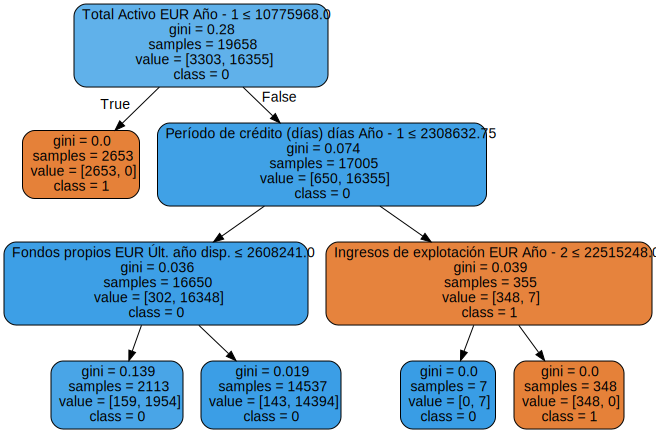

In [111]:
imprimeArbol(tr,X_train,Y_train,5)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.
clf = GridSearchCV(
    estimator = GradientBoostingClassifier(random_state=seed),
    random_state = seed,
    param_distributions = {'learning_rate' : [0.15,0.2,0.25,0.3,0.35],
                          'n_estimators' : [70,80,90,100,120,140],
                          'max_depth' : [2,3,4,5,6],
                          'loss' : ['deviance','exponential']},
    scoring = 'accuracy',
    cv = 5
)

fitted = clf.fot(X_train,y_train)
print(fitted.best_params_)
print(fitted.best_score_)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


clf = RandomizedSearchCV(
    estimator = AdaBoostClassifier(random_state=seed,base_estimator=DecisionTreeClassifier(random_state = seed)),
    random_state = seed,
    param_distributions = {'learning_rate' : [1.0,0.9,0.8],
                 'n_estimators' : [90,100,120,140,150,160],
                 'base_estimator__max_depth' : [2,3,4,5,6,7]},
    scoring = 'accuracy',
    cv = 5,
    n_iter = 50
)

fitted1 = clf.fit(X,y)


print(fitted1.best_params_)
print(fitted1.best_score_)

In [ ]:
clf = RandomizedSearchCV(
    estimator = RandomForestClassifier(random_state=seed),
    random_state = seed,
    param_distributions = {'n_estimators' : [50,60,70,80,100,120,140],
                 'criterion' : ['entropy','gini'],
                 'max_features' : [1.0,0.9,0.8,0.7,0.5,0.4,],
                 'max_depth' : [2,3,4,5,6,7,8],
                 'bootstrap' : [True, False]},
    scoring = 'accuracy',
    cv = 4,
    n_iter = 50
)

fitted2 = clf.fit(X,y)


print(fitted2.best_params_)
print(fitted2.best_score_)

In [ ]:
from xgboost import XGBClassifier

model = GridSearchCV(
    estimator = XGBClassifier(),
    param_grid = {'max_depth':[i for i in range(1,21)],'n_iterations':[10,50,100]},
    scoring = 'accuracy',
    cv = 10
)

model = model.fit(X_train,y_train)